In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

<h3>data analysis<h3>

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'image_manipulation.ipynb',
 'image_rewrite.ipynb',
 'image_rotate.ipynb',
 'models',
 'models_e',
 'models_r',
 'models_r+e',
 'pictures',
 'pictures_r',
 'predictor.ipynb',
 'predictor_edge_rec.ipynb',
 'predictor_rotated.ipynb',
 'predictor_rotated.jpg',
 'predictor_rotate_edge_rec.ipynb',
 'predictor_rotate_edge_rec.jpg',
 'rps_cnn.ipynb',
 'rps_cnn_edge_rec.ipynb',
 'rps_cnn_rotated.ipynb',
 'rps_cnn_rotate_edge_rec.ipynb',
 'test',
 'test_e',
 'test_r',
 'test_r+e',
 'train',
 'train_e',
 'train_r',
 'train_r+e']

In [3]:
os.listdir('test_r')

['paper', 'rock', 'scissors']

In [4]:
os.listdir('train_r')

['paper', 'rock', 'scissors']

In [5]:
rock_dir = 'train_r\\rock\\' + os.listdir('train_r\\rock')[0]

In [6]:
rock_img = imread(rock_dir)

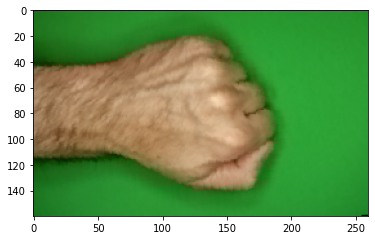

In [7]:
plt.imshow(rock_img)

In [8]:
rock_img

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.13725491, 0.5568628 , 0.15294118],
        [0.13725491, 0.5568628 , 0.14901961],
        [0.14509805, 0.5529412 , 0.15294118]],

       [[0.10588235, 0.4392157 , 0.10588235],
        [0.10980392, 0.4392157 , 0.10196079],
        [0.10588235, 0.4392157 , 0.10196079],
        ...,
        [0.14117648, 0.56078434, 0.15294118],
        [0.13725491, 0.5568628 , 0.14901961],
        [0.14509805, 0.5529412 , 0.15686275]],

       [[0.10196079, 0.44313726, 0.09803922],
        [0.10588235, 0.4392157 , 0.09803922],
        [0.10980392, 0.4392157 , 0.09803922],
        ...,
        [0.13725491, 0.5568628 , 0.14901961],
        [0.13725491, 0.5568628 , 0.14901961],
        [0.14117648, 0.5529412 , 0.14901961]],

       ...,

       [[0.10588235, 0.45882353, 0.1254902 ],
        [0.10196079, 0.45490196, 0.12156863],
        [0.10588235, 0

In [9]:
rock_img.max()

0.9882353

In [10]:
rock_img.min()

0.0

In [11]:
rock_img.shape

(160, 260, 3)

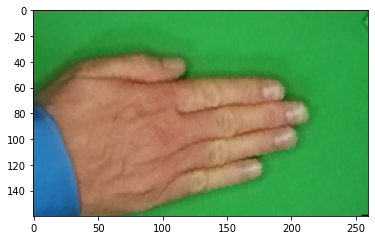

In [12]:
paper_dir = 'train_r\\paper\\' + os.listdir('train_r\\paper')[0]
paper_img = imread(paper_dir)
plt.imshow(paper_img)

In [13]:
paper_img.shape

(160, 260, 3)

In [14]:
len(os.listdir('train_r\\rock'))

626

In [15]:
len(os.listdir('train_r\\paper'))

612

In [16]:
len(os.listdir('train_r\\scissors'))

650

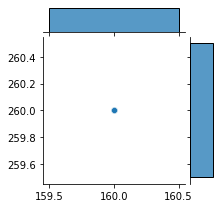

In [17]:
dim1 = []
dim2 = []
for dir1 in ['train_r\\','test_r\\']:
    for dir2 in os.listdir(dir1):
        for img_name in os.listdir(dir1 + dir2): 
            img = imread(dir1 + dir2 + '\\' + img_name)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
sns.jointplot(x=dim1,y=dim2,height=3)

<h3>preparing image generator<h3>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [20]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
#                                rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=False,
                               fill_mode='nearest'
                              )

In [21]:
rock_img[0][0][0]

0.0

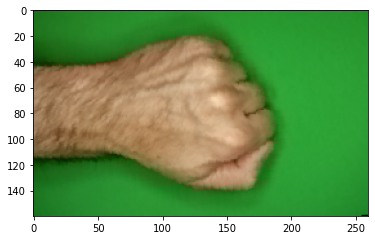

In [22]:
plt.imshow(rock_img)

In [23]:
image_gen.random_transform(rock_img)[0][0][0]

0.12156863

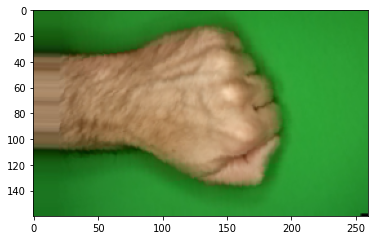

In [24]:
plt.imshow(image_gen.random_transform(rock_img))

In [25]:
image_gen.flow_from_directory('train_r')

Found 1888 images belonging to 3 classes.


In [26]:
image_gen.flow_from_directory('test_r')

Found 300 images belonging to 3 classes.


<h3>creating model<h3>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
image_shape = (60, 90, 3)

In [29]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 88, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 44, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 42, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 19, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

<h3>training the model<3>

In [33]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [34]:
batch_size = 16

In [35]:
train_image_gen = image_gen.flow_from_directory('train_r',
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 1888 images belonging to 3 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory('test_r',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 300 images belonging to 3 classes.


In [37]:
train_image_gen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [38]:
results = model.fit(train_image_gen,
                    epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Train for 118 steps, validate for 19 steps
Epoch 1/20
118/118 [==============================] - 28s 235ms/step - loss: 2.1834 - accuracy: 0.3596 - val_loss: 1.0270 - val_accuracy: 0.5333
Epoch 2/20
118/118 [==============================] - 30s 254ms/step - loss: 0.8078 - accuracy: 0.6314 - val_loss: 0.7992 - val_accuracy: 0.5433
Epoch 3/20
118/118 [==============================] - 30s 251ms/step - loss: 0.6861 - accuracy: 0.7357 - val_loss: 0.5348 - val_accuracy: 0.8133
Epoch 4/20
118/118 [==============================] - 27s 232ms/step - loss: 0.4856 - accuracy: 0.8252 - val_loss: 0.3819 - val_accuracy: 0.8833
Epoch 5/20
118/118 [==============================] - 28s 237ms/step - loss: 0.4134 - accuracy: 0.8734 - val_loss: 0.3845 - val_accuracy: 0.8733
Epoch 6/20
118/118 [==============================] - 30s 258ms/step - loss: 0.3709 - accuracy: 0.8792 - val_loss: 0.2615 - val_accuracy: 0.9033
Epoch 7/20
118/118 [==============================] - 31s 263ms/step - loss: 0.3498 - a

In [39]:
from datetime import datetime

In [40]:
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save('models_r\\' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_r\2020-11-13--17-15\assets


<h3>model evaluation<h3>

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

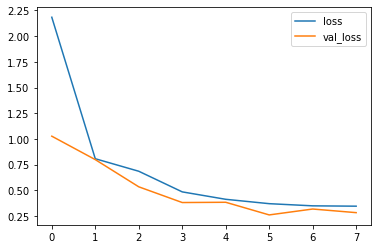

In [44]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

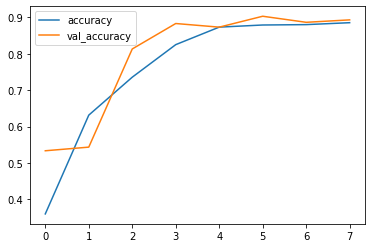

In [45]:
losses[['accuracy','val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(test_image_gen)

19/19 [==============================] - 2s 102ms/step - loss: 0.2973 - accuracy: 0.8833


[0.29733660630881786, 0.8833333]

In [48]:
pred_probabilities = model.predict(test_image_gen)

In [49]:
pred_probabilities

array([[9.73554850e-01, 4.81104432e-03, 2.16340870e-02],
       [6.80557609e-01, 7.15068182e-08, 3.19442302e-01],
       [1.25715166e-01, 8.24665666e-01, 4.96192202e-02],
       [6.22966290e-01, 3.76156777e-01, 8.76975828e-04],
       [8.21313381e-01, 1.72789115e-02, 1.61407724e-01],
       [9.43523824e-01, 7.01968186e-03, 4.94565144e-02],
       [9.63586032e-01, 3.43756074e-05, 3.63796651e-02],
       [1.54705336e-02, 9.82148647e-01, 2.38080160e-03],
       [9.14676428e-01, 1.23049296e-03, 8.40931237e-02],
       [9.89723682e-01, 6.32090960e-03, 3.95542430e-03],
       [1.92472681e-01, 5.58810898e-05, 8.07471395e-01],
       [9.95733917e-01, 1.14279304e-04, 4.15175874e-03],
       [5.00236094e-01, 3.44321677e-07, 4.99763548e-01],
       [9.63598728e-01, 2.13183258e-02, 1.50828743e-02],
       [9.98318672e-01, 5.19802870e-06, 1.67612114e-03],
       [9.97552574e-01, 1.19216123e-03, 1.25533342e-03],
       [9.31960404e-01, 1.68044511e-02, 5.12352176e-02],
       [5.13512731e-01, 3.42418

In [50]:
pred_probabilities.shape

(300, 3)

In [51]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions = np.argmax(model.predict(test_image_gen), axis=-1)

In [54]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       100
           1       0.92      0.98      0.95       100
           2       0.87      0.97      0.92       100

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [55]:
confusion_matrix(test_image_gen.classes,predictions)

array([[78,  8, 14],
       [ 2, 98,  0],
       [ 2,  1, 97]], dtype=int64)

<h3>testing predictions<h3>

In [56]:
# from tensorflow.keras.models import load_model

In [57]:
# model = load_model('models//2020-11-03--00-39')

In [58]:
# model.summary()

In [59]:
# from tensorflow.keras.preprocessing import image

In [60]:
# no_images = 15

In [61]:
# plt.figure(figsize=(12,10))
# grid_x = 6
# grid_y = int(no_images/3)

# for i in range(no_images):
#     my_image = image.load_img('pictures\\' + str(i+1)+'.jpg',target_size=image_shape,color_mode="rgb")
#     my_image = image.img_to_array(my_image)
#     my_image_p = np.expand_dims(my_image, axis=0)
#     label_no = np.argmax(model.predict(my_image_p))
#     for key, value in train_image_gen.class_indices.items():
#         if value == label_no:
#             label = key
            
#     plt.subplot(grid_y,grid_x,i*2+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)       
#     plt.imshow(my_image/255)
#     plt.xlabel(label)
    
#     plt.subplot(grid_y,grid_x,i*2+2)
#     plt.yticks([])
#     plt.grid(False)
#     plt.bar(range(3),model.predict(my_image_p).reshape(3))